In [1]:
import numpy as np
import cv2
import os
import random
from matplotlib import pyplot as plt
from matplotlib.image import imread

1 [8, 6, 4, 5, 2, 3, 10] [1, 7, 9]
2 [7, 5, 6, 4, 8, 3, 1] [2, 9, 10]
3 [5, 9, 1, 10, 4, 7, 3] [2, 6, 8]
4 [3, 6, 7, 9, 4, 5, 8] [1, 2, 10]
5 [9, 4, 10, 1, 2, 8, 6] [3, 5, 7]
6 [5, 3, 2, 7, 1, 10, 6] [4, 8, 9]
7 [6, 2, 4, 7, 3, 10, 9] [1, 5, 8]
8 [6, 2, 1, 10, 8, 3, 5] [4, 7, 9]
9 [1, 9, 10, 3, 7, 8, 6] [2, 4, 5]
10 [9, 5, 8, 2, 1, 10, 3] [4, 6, 7]
11 [10, 5, 2, 9, 4, 8, 1] [3, 6, 7]
12 [6, 1, 4, 2, 3, 8, 5] [7, 9, 10]
13 [10, 7, 5, 2, 8, 3, 4] [1, 6, 9]
14 [10, 1, 2, 6, 3, 7, 8] [4, 5, 9]
15 [9, 8, 7, 1, 5, 3, 10] [2, 4, 6]
16 [9, 3, 1, 4, 2, 6, 8] [5, 7, 10]
17 [6, 9, 8, 7, 10, 2, 4] [1, 3, 5]
18 [5, 8, 6, 3, 7, 1, 9] [2, 4, 10]
19 [9, 3, 10, 8, 7, 2, 5] [1, 4, 6]
20 [2, 5, 4, 3, 7, 6, 9] [1, 8, 10]
21 [10, 8, 2, 6, 1, 5, 4] [3, 7, 9]
22 [9, 7, 3, 6, 5, 8, 10] [1, 2, 4]
23 [1, 4, 7, 3, 8, 6, 10] [2, 5, 9]
24 [9, 1, 2, 5, 7, 10, 6] [3, 4, 8]
25 [8, 10, 7, 9, 3, 4, 1] [2, 5, 6]
26 [2, 1, 3, 9, 5, 6, 10] [4, 7, 8]
27 [6, 4, 2, 1, 7, 3, 10] [5, 8, 9]
28 [1, 5, 6, 7, 2, 9, 3] [4, 8, 10]
2

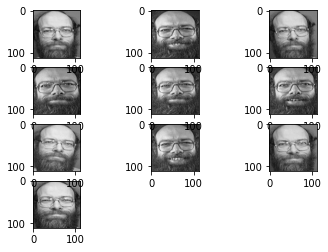

In [2]:
faces_dir = "./dataset/train"                               ## Path to the dataset
faces_count = len(os.listdir(faces_dir))                    ## Number of folders of images in the dataset

train_count = 7                                             ## Number of images out of 10 in each folder being allocated to training set

height = 112                                                  ## Height of the image   
width = 112                                                   ## Width of the image
pixels=height*width                                           ## Total number of pixels in the image

training_ids = []                                            ## List of training image ids in train dataset
test1_ids = []                                                ## List of test1 image ids in train dataset

cur_img_train = 0                                            ## Current image number in training set
cur_img_test1 = 0                                               ## Current image number in test1 set
total_train_images=train_count*faces_count
total_test1_images=(10-train_count)*faces_count
train_matrix = np.ndarray(shape=(total_train_images, pixels), dtype=np.float64)          ## matrix storing all the images of the training set
test1_matrix=np.ndarray(shape=(total_test1_images,pixels),dtype=np.float64)                 ## matrix storing all the images of the test1 set

for face_id in range(1, faces_count + 1):
    
    sample_training_ids = random.sample(range(1, 11), train_count)                          ## Randomly selecting 7 images out of 10 in each folder for training set
    sample_test1_ids = [i for i in range(1,11) if i not in sample_training_ids]             ## Remaining 3 images in each folder for test1 set
    training_ids.append(sample_training_ids)                                                ## Appending the image ids to the list
    test1_ids.append(sample_test1_ids)  

    print(face_id,sample_training_ids, sample_test1_ids) 
    for training_id in sample_training_ids:
        path_to_img = os.path.join(faces_dir,'s' + str(face_id), str(training_id) + '.pgm')     ## Path to the image    
        img = cv2.imread(path_to_img,0)                                                         ## Reading the image
        img=cv2.resize(img,(height,width))                                                      ## Resizing the image
        train_matrix[cur_img_train,:] = np.array(img, dtype='float64').flatten()             ## Storing the image in the training tensor
                              
        plt.subplot(4,3,training_id)                                                            ## Plotting the image
        plt.imshow(img, cmap='gray')                                                            
        cur_img_train += 1                                                                      ## Incrementing the current image number in training set
    
    for test1_id in sample_test1_ids:
        path_to_img = os.path.join(faces_dir,'s' + str(face_id), str(test1_id) + '.pgm')         
        img = cv2.imread(path_to_img,0)
        img=cv2.resize(img,(height,width))
        test1_matrix[cur_img_test1,:] = np.array(img, dtype='float64').flatten()
                            
        plt.subplot(4,3,test1_id)
        plt.imshow(img, cmap='gray')                                   
        cur_img_test1 += 1

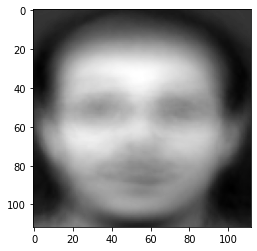

In [3]:
face_mean_matrix = np.zeros((1,pixels))                                  ## Initialising a vector for storing the mean face
for i in train_matrix:
    face_mean_matrix = np.add(face_mean_matrix,i)                               ## Adding all the images in the training set to get the mean face

face_mean_matrix = np.divide(face_mean_matrix,total_train_images).flatten()     ## Dividing the sum by the total number of images to get the mean face
plt.imshow(face_mean_matrix.reshape(height, width), cmap='gray')
plt.show()

In [4]:
normalise_train_matrix = np.ndarray(shape=(total_train_images, height*width))            ## Initialising a matrix for storing the normalised training set

for i in range(total_train_images):
    normalise_train_matrix[i] = np.subtract(train_matrix[i],face_mean_matrix)                ## Subtracting the mean face from each image in the training set

In [29]:
normalise_train_matrix.shape

(259, 12544)

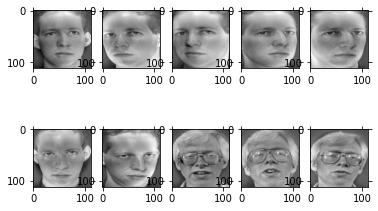

In [5]:
for i in range(10):
    img = normalise_train_matrix[i].reshape(height,width)                       ## Plotting the normalised images
    plt.subplot(2,5,i+1)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [6]:
cov_matrix = normalise_train_matrix@normalise_train_matrix.T              
cov_matrix.shape                                       ## Calculating the covariance matrix by multiplying the normalised training set with its transpose

(259, 259)

In [7]:
eig_values, eig_vectors, = np.linalg.eig(cov_matrix)                  ## Calculating the eigenvalues and eigenvectors of the covariance matrix

In [8]:
# Sort the (eigenvalue, eigenvector) tuples from high to low
pairs_eigen = [(eig_values[i], eig_vectors[:,i]) for i in range(len(eig_values))]
pairs_eigen.sort(reverse=True)
eigvalues_sort  = [pairs_eigen[i][0] for i in range(len(eig_values))]
eigvectors_sort = [pairs_eigen[i][1] for i in range(len(eig_values))]

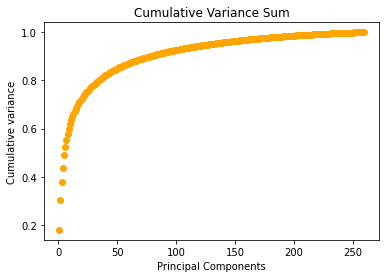

In [9]:
cumulative_variance = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)           ## Calculating the cumulative sum of the eigenvalues to determine the number of eigen vectors to be used
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cumulative Variance Sum')
plt.ylabel('Cumulative variance')
plt.xlabel('Principal Components')

plt.scatter(num_comp, cumulative_variance, color="orange")
plt.show()

In [10]:
print(cumulative_variance[50])
reduced_data = np.array(eigvectors_sort[:50]).transpose()        ## Selecting the first 50 eigenvectors for data reduction as they cover more thatn 85% of the variance

proj_data = np.dot(train_matrix.T,reduced_data)          ## Obtaining the actual eigen vectors by reduced data with the train matrix
proj_data = proj_data.transpose()

0.8518728351662797


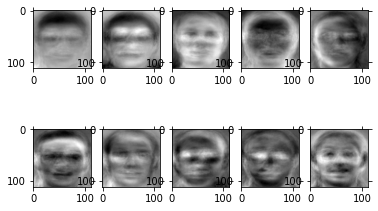

In [11]:
for i in range(10):                        ## Plotting the projected images
    img = proj_data[i].reshape(height,width)
    plt.subplot(2,5,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [12]:
w = np.array([np.dot(proj_data,i) for i in normalise_train_matrix])     ## Calculating the weights for each image in the training set by taking the projection
w.shape

(259, 50)

#### **Different poses of the people in the training set**

In [13]:
normalise_test1_matrix = np.ndarray(shape=(total_test1_images, height*width))        ## Initialising a matrix for storing the normalised test set
for i in range(total_test1_images):
    normalise_test1_matrix[i] = np.subtract(test1_matrix[i],face_mean_matrix)           ## Subtracting the mean face from each image in the test set

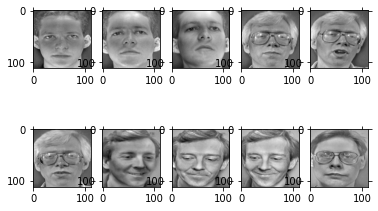

In [14]:
for i in range(10):                                  ## Plotting the normalised test images
    img=normalise_test1_matrix[i].reshape(height, width)
    plt.subplot(2,5,i+1)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

Toy Example to check the working of the algorithm before calculating the accuracy from it and optimising the theta threshold value

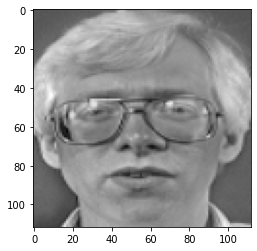

In [15]:
i=5                                    ## Selecting the 5th image in the test set
plt.imshow(normalise_test1_matrix[i].reshape(height, width), cmap='gray')
w_unknown = np.dot(proj_data, normalise_test1_matrix[i].T)   ## Calculating the weights for the 5th image in the test set

The face that closely matches the above face from the training set is: 


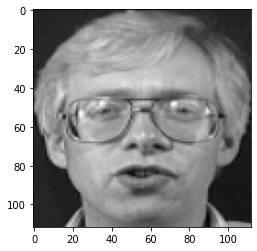

In [16]:
diff  = w - w_unknown                   ## Calculating the difference between the weights of the 5th image and all the images in the training set
norms = np.linalg.norm(diff, axis=1)    ## Calculating the norms of the differences
# print(norms)
min(norms)                              ## Finding the minimum norm
index = np.argmin(norms)                ## Finding the index of the minimum norm
print("The face that closely matches the above face from the training set is: ")
plt.imshow(train_matrix[index].reshape(height, width), cmap='gray')
plt.show()

#### **Calculating the accuracy of the model implemenented**

In [17]:
mapping={}                             ## Creating a dictionary to store the class of the image 
for i in range(faces_count):
    for j in range(3):                 ## Since there are 3 test images from each class and 7 training images. Therefore mapping the test images to the training images so that if the closely matched image turns out to be in their class then it is a match
        mapping[j+(3*i)]=[7*i,7*i+1,7*i+2,7*i+3,7*i+4,7*i+5,7*i+6]

Accuracy achieved is:  96.3963963963964 %
Wrongly Predicted images:
{0: 32872941.525297783, 53: 18819072.4296639, 82: 26538522.395315405, 95: 34314666.111605674}


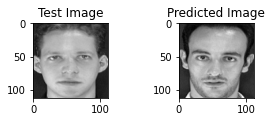

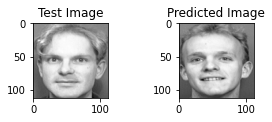

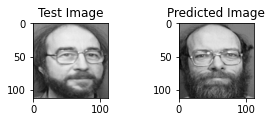

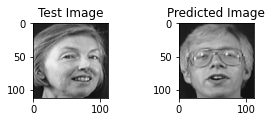

In [18]:
correct_predictions = 0            ## Initialising the number of correct predictions to 0
wrong_predictions={}               ## Creating a dictionary to store the wrongly predicted images
for i in range(total_test1_images):
    w_unknown = np.dot(proj_data, normalise_test1_matrix[i].T)          ## Calculating the weights for each image in the test set
    diff  = w - w_unknown                                               ## Calculating the difference between the weights of the image and all the images in the training set
    norms = np.linalg.norm(diff, axis=1)                                ## Calculating the norms of the differences 
    norm_index=min(norms)                                               ## Finding the minimum norm
    index = np.argmin(norms)                                            ## Finding the index of the minimum norm 
    if index in mapping[i]:   
        correct_predictions+=1                                         ## If the index of the minimum norm is in the mapping dictionary then it is a correct prediction
    else:
        wrong_predictions[i]=norm_index                                ## If the index of the minimum norm is not in the mapping dictionary then it is a wrong prediction and the norm is stored in the dictionary
        fig = plt.figure(figsize=(10, 8))                              ## Plotting the wrongly predicted images and the closest image from the training set
        fig.add_subplot(5, 4, 1)
        plt.title("Test Image")
        plt.imshow(test1_matrix[i].reshape(height, width), cmap='gray')
        fig.add_subplot(5, 4, 2)
        plt.title("Predicted Image")
        plt.imshow(train_matrix[index].reshape(height, width), cmap='gray')

print("Accuracy achieved is: ",(correct_predictions/total_test1_images)*100,"%")         ## Calculating the accuracy of the model
print("Wrongly Predicted images:")
print(wrong_predictions)

The above printed test faces did not match to the correct person. Thus, the minimum norm among these should provide us the minimum value at which a face image from the test will not be matched to the actual train image. Thus helping in deciding the threshold. (A heuristic approach)

In [19]:
max_key = max(wrong_predictions, key=wrong_predictions.get)               ## Finding the image with the maximum norm
print(max_key, wrong_predictions[max_key])                                ## Printing the image with the maximum norm

min_key = min(wrong_predictions, key=wrong_predictions.get)               ## Finding the image with the minimum norm
print(min_key, wrong_predictions[min_key])                                ## Printing the image with the minimum norm
wrong_prediction_min_norm = wrong_predictions[min_key]                    ## Storing the minimum norm
print("From the above values it is clear that at the min norm value of",wrong_predictions[min_key],"the image is predicted incorrectly. Thus, lets also consider the condition that the norm should be less than this value for it to be correctly matched")

95 34314666.111605674
53 18819072.4296639
From the above values it is clear that at the min norm value of 18819072.4296639 the image is predicted incorrectly. Thus, lets also consider the condition that the norm should be less than this value for it to be correctly matched


c:\Users\Sanchit Kanda\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


Accuracy achieved is:  61.261261261261254 %
Wrongly Predicted images due to threshold norm condition:
{1: 35546240.5501149, 2: 32991807.54768119, 4: 25235849.799612008, 9: 20914459.195316095, 11: 19484102.651450593, 21: 21885880.906261716, 23: 23292780.046420522, 25: 20136366.87676522, 26: 20337183.387515195, 28: 30626280.83275152, 29: 30083726.945488445, 30: 26522321.7393233, 31: 20627273.217229497, 32: 21987733.40325516, 34: 29810424.060320802, 35: 32422133.449453894, 38: 18882897.542469338, 40: 19947953.960613146, 41: 31149185.42880816, 46: 25066899.5335976, 47: 32806754.66006498, 48: 30917328.465663724, 50: 19602976.216568056, 52: 24751882.22286793, 56: 23371742.096683852, 58: 24046228.86840187, 69: 20475280.89158052, 70: 31675115.618716776, 71: 19036735.625045262, 76: 30395998.73175187, 80: 25330353.563617412, 81: 22801431.704522885, 83: 24916249.220879577, 86: 23046865.644229524, 88: 19278451.786843937, 90: 20704361.299771946, 92: 19190272.494995747, 93: 23178410.51895744, 97: 30

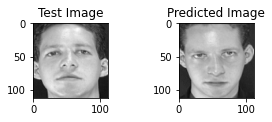

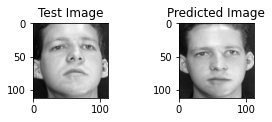

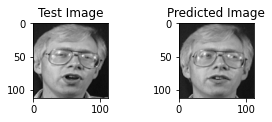

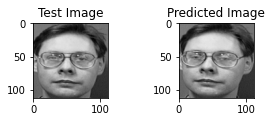

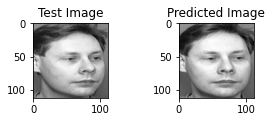

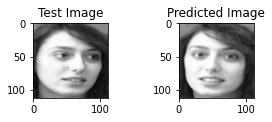

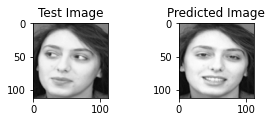

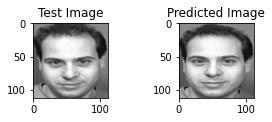

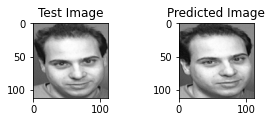

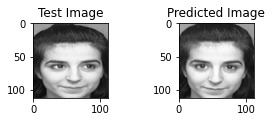

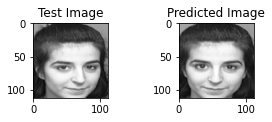

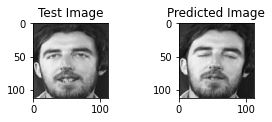

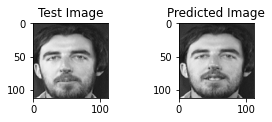

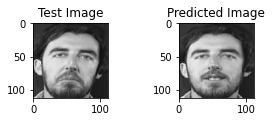

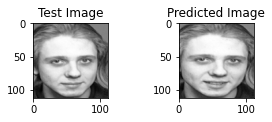

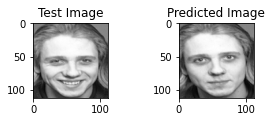

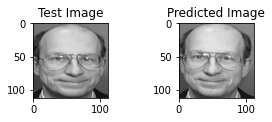

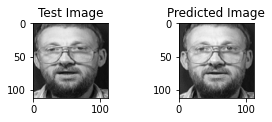

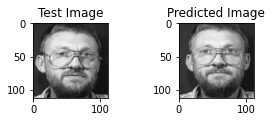

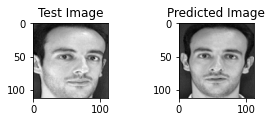

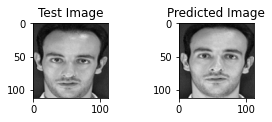

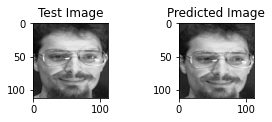

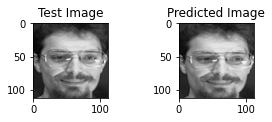

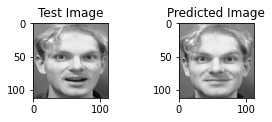

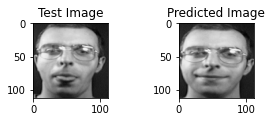

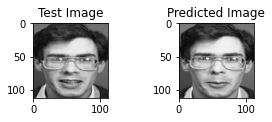

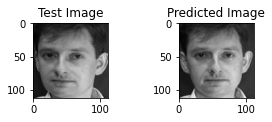

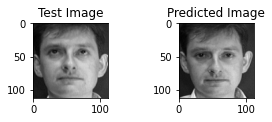

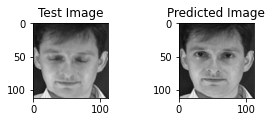

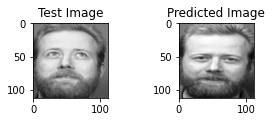

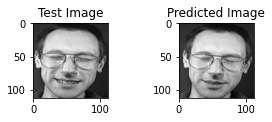

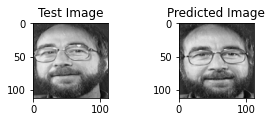

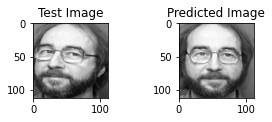

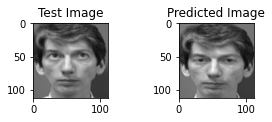

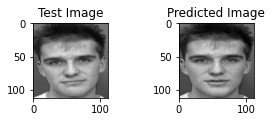

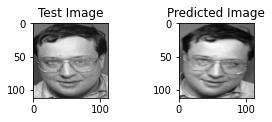

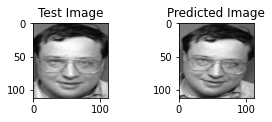

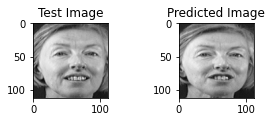

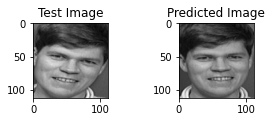

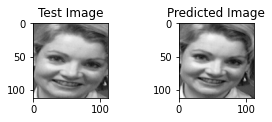

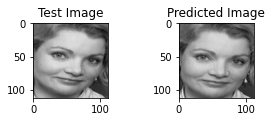

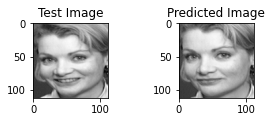

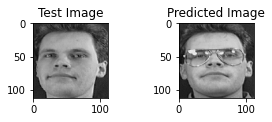

In [20]:
correct_predictions = 0                           ## Initialising the number of correct predictions to 0
wrong_predictions={}                              ## Creating a dictionary to store the wrongly predicted images
wrong_norm_predictions={}                         ## Creating a dictionary to store the wrongly predicted images because of introduction of the norm value
for i in range(total_test1_images):
    w_unknown = np.dot(proj_data, normalise_test1_matrix[i].T)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    norm_value=min(norms)
    index = np.argmin(norms)
    if index in mapping[i] and norm_value<wrong_prediction_min_norm:         ## Norm indicates that the image is correctly predicted and indeed it is correcly predicted. Thus, correct prediction
        correct_predictions+=1
    elif(norm_value>=wrong_prediction_min_norm and index in mapping[i]):     ## Norm indicates that the image is incorrectly predicted but it is correctly predicted. Thus a wrong prediction because of norm.
        wrong_norm_predictions[i]=norm_value
        fig = plt.figure(figsize=(10, 8))
        fig.add_subplot(5, 4, 1)
        plt.title("Test Image")
        plt.imshow(test1_matrix[i].reshape(height, width), cmap='gray')
        fig.add_subplot(5, 4, 2)
        plt.title("Predicted Image")
        plt.imshow(train_matrix[index].reshape(height, width), cmap='gray')
    elif(norm_value<wrong_prediction_min_norm and index not in mapping[i]):  ## Norm indicates that the image is correctly predicted but it is incorrectly predicted. Thus, a wrong prediction.
        # wrong_norm_predictions[i]=norm_value
        # fig = plt.figure(figsize=(10, 8))
        # fig.add_subplot(5, 4, 1)
        # plt.title("Test Image")
        # plt.imshow(test1_matrix[i].reshape(height, width), cmap='gray')
        # fig.add_subplot(5, 4, 2)
        # plt.title("Predicted Image")
        plt.imshow(train_matrix[index].reshape(height, width), cmap='gray')
    else:                                                       ## Norm indicates that the image is incorrectly predicted and indeed it is incorrectly predicted. Thus, correct prediction.
        correct_predictions+=1   


print("Accuracy achieved is: ",(correct_predictions/total_test1_images)*100,"%")
print("Wrongly Predicted images due to threshold norm condition:")
print(wrong_norm_predictions)

In [21]:
value_norm_list=[]              ## Creating a list to store the norm values of the wrongly predicted images
for (key, value) in wrong_norm_predictions.items():
    value_norm_list.append(value)
value_norm_list.sort()         ## Sorting the list in ascending order
print(value_norm_list)
value_norm_list_copy=value_norm_list.copy()      ## Creating a copy of the list

[18882897.542469338, 19036735.625045262, 19190272.494995747, 19278451.786843937, 19484102.651450593, 19602976.216568056, 19947953.960613146, 20136366.87676522, 20172302.17314096, 20337183.387515195, 20475280.89158052, 20627273.217229497, 20704361.299771946, 20914459.195316095, 21885880.906261716, 21987733.40325516, 22801431.704522885, 23046865.644229524, 23178410.51895744, 23292780.046420522, 23371742.096683852, 24046228.86840187, 24171611.397905327, 24617539.23784384, 24751882.22286793, 24916249.220879577, 25066899.5335976, 25235849.799612008, 25330353.563617412, 26522321.7393233, 29810424.060320802, 30083726.945488445, 30395998.73175187, 30626280.83275152, 30762243.24965705, 30917328.465663724, 31149185.42880816, 31675115.618716776, 32422133.449453894, 32806754.66006498, 32991807.54768119, 35546240.5501149, 37819252.70950037]


In [22]:
threshold_value=np.percentile(value_norm_list,70)      ## Finding the 70th percentile of the list and setting it as the threshold value
threshold_value

27837562.667722296

Accuracy achieved is:  86.48648648648648 %
Wrongly Predictions that were corrected because of the norm condition:
{0: 32872941.525297783, 95: 34314666.111605674}


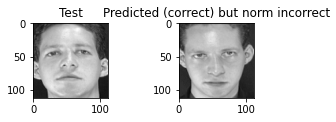

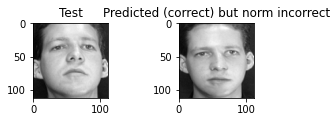

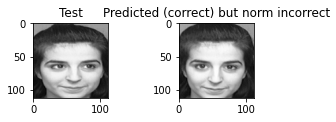

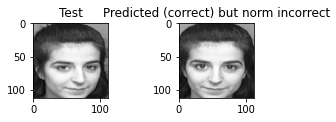

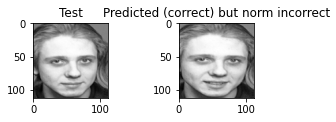

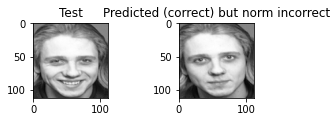

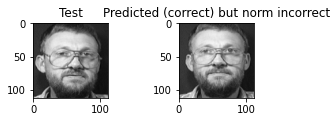

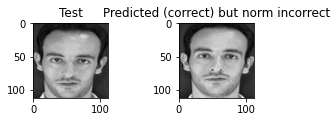

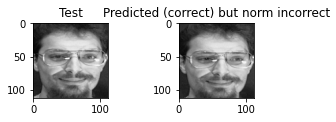

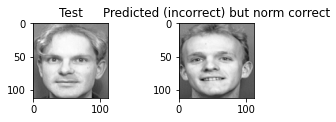

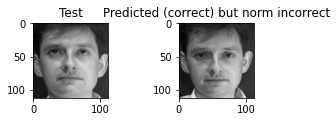

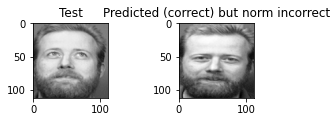

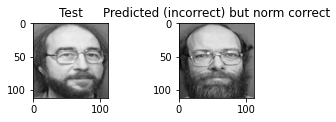

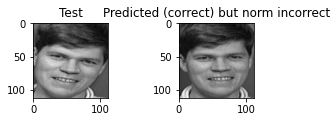

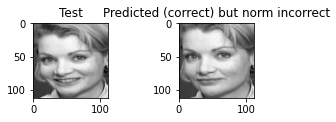

In [23]:
correct_predictions = 0
wrong_predictions={}
wrong_prediction_saved={}
wrong_norm_predictions={}
for i in range(total_test1_images):
    w_unknown = np.dot(proj_data, normalise_test1_matrix[i].T)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    norm_value=min(norms)
    index = np.argmin(norms)
    if index in mapping[i] and norm_value<threshold_value:         ## Norm indicates that the image is correctly predicted and indeed it is correcly predicted. Thus, correct prediction
        correct_predictions+=1
    elif(norm_value>=threshold_value and index in mapping[i]):     ## Norm indicates that the image is incorrectly predicted but it is correctly predicted. Thus,a wrong prediction.
        wrong_norm_predictions[i]=norm_value
        fig = plt.figure(figsize=(10, 8))
        fig.add_subplot(5, 4, 1)
        plt.title("Test")
        plt.imshow(test1_matrix[i].reshape(height, width), cmap='gray')
        fig.add_subplot(5, 4, 2)
        plt.title("Predicted (correct) but norm incorrect")
        plt.imshow(train_matrix[index].reshape(height, width), cmap='gray')
    elif(norm_value<threshold_value and index not in mapping[i]):  ## Norm indicates that the image is correctly predicted but it is incorrectly predicted. Thus, a wrong prediction.
        fig = plt.figure(figsize=(10, 8))
        fig.add_subplot(5, 4, 1)
        plt.title("Test")
        plt.imshow(test1_matrix[i].reshape(height, width), cmap='gray')
        fig.add_subplot(5, 4, 2)
        plt.title("Predicted (incorrect) but norm correct")
        plt.imshow(train_matrix[index].reshape(height, width), cmap='gray')
    else:                                                       ## Norm indicates that the image is incorrectly predicted and indeed it is incorrectly predicted. Thus, correct prediction.
        correct_predictions+=1
        wrong_prediction_saved[i]=norm_value                                  


print("Accuracy achieved is: ",(correct_predictions/total_test1_images)*100,"%")
print("Wrongly Predictions that were corrected because of the norm condition:")
print(wrong_prediction_saved)

### **Evaluating the algorithm on test 2 dataset with the help of the threshold value defined**

(30, 12544)

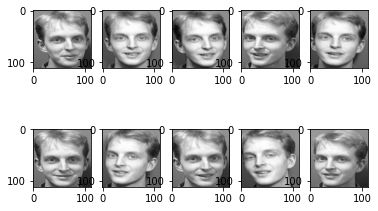

In [24]:
test2_dir="./dataset/test"                           ## Path to the test directory
folder_count=len(os.listdir(test2_dir))              ## Counting the number of folders in the test directory
test2_images = os.listdir(test2_dir)                  ## Listing all the folders in the test directory 
total_test2_images=10*folder_count                     
test2_matrix = np.ndarray(shape=(total_test2_images, pixels), dtype=np.float64)      ## Creating a tensor to store the test2 images
cur_test2_image=0;                   ## Variable to keep track of the current image number

for i in range(38,41):
    for j in range(1,11):
        img_path=os.path.join(test2_dir,'s' + str(i), str(j) + '.pgm')         ## Path to the current test2 image
        img = cv2.imread(img_path,0)
        img=cv2.resize(img,(height,width))
        test2_matrix[cur_test2_image:]=np.array(img,dtype=np.float64).flatten()
        plt.subplot(2,5,j)
        # plt.figure()
        plt.imshow(img,cmap='gray')
        cur_test2_image+=1
test2_matrix.shape

In [25]:
normalise_test2_matrix = np.ndarray(shape=(total_test2_images, height*width))      ## Creating a tensor to store the normalised test2 images
for i in range(total_test2_images):
    normalise_test2_matrix[i] = np.subtract(test2_matrix[i],face_mean_matrix)             ## Subtracting the mean face from the test2 images to normalise them

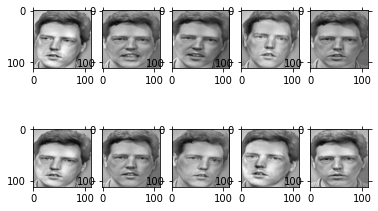

In [26]:
for i in range(10):                                    ## Displaying the normalised test2 images
    img=normalise_test2_matrix[i].reshape(height, width)
    plt.subplot(2,5,i+1)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

Accuracy achieved is:  76.66666666666667 %
Incorrectly predicted images that were not corrected because of the norm condition:


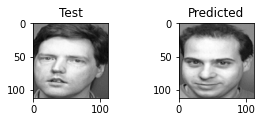

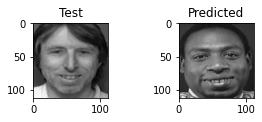

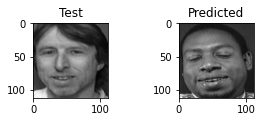

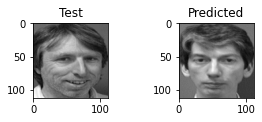

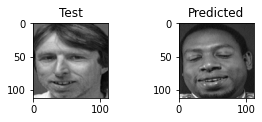

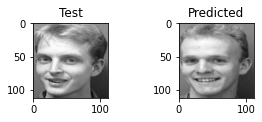

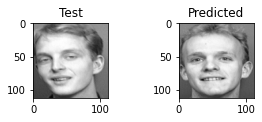

In [27]:
correct_predictions = 0                 ## Variable to keep track of the number of correct predictions
norm_values_list=[]                    ## Creating a list to store the norm values of the wrongly predicted images
for i in range(total_test2_images):    ## Looping through all the test2 images
    w_unknown = np.dot(proj_data, normalise_test2_matrix[i].T)          ## Projecting the test2 image onto the eigenfaces
    diff  = w - w_unknown                                 ## Finding the difference between the projected test2 image and the projected training images
    norms = np.linalg.norm(diff, axis=1)                  ## Finding the norm of the difference
    norm_value=min(norms)
    norm_values_list.append(norm_value)
    index = np.argmin(norms)
    if(norm_value>threshold_value):                       ## Since the images in this dataset does not belong to any person that was present in the training dataset, the norm value will be greater than the threshold value
        correct_predictions+=1
    else:
        fig = plt.figure(figsize=(10, 8))                ## Displaying the wrongly predicted images because of the norm condition
        fig.add_subplot(5, 4, 1)
        plt.title("Test")
        plt.imshow(test2_matrix[i].reshape(height, width), cmap='gray')
        fig.add_subplot(5, 4, 2)
        plt.title("Predicted")
        plt.imshow(train_matrix[index].reshape(height, width), cmap='gray')
                  
# print(norm_values_list)
print("Accuracy achieved is: ",(correct_predictions/total_test2_images)*100,"%")
print("Incorrectly predicted images that were not corrected because of the norm condition:")